# Introduction
Welcome to this Jupyter Notebook, dedicated to addressing a pressing issue in the biomedical industry: the early detection and classification of TP53 gene mutations. Given the TP53 gene's critical role in tumor suppression, understanding its mutations is vital for devising effective therapeutic strategies and offering personalized treatment plans.

The objective of this notebook is twofold:

Early Detection: To leverage genomic data for the early diagnosis of potential cancerous mutations in the TP53 gene.
Mutation Classification: Beyond just identifying a mutation, we aim to predict the specific type of mutation, further refining our understanding and allowing for more targeted interventions.
Through a systematic data analytics approach, we will navigate the journey from data collection and preprocessing to advanced analytical modeling. Our hope is that the insights gleaned from this analysis will contribute to enhancing patient care and therapeutic outcomes in the realm of oncology.

# Data Collection:

## 1. Clinical Data: This dataset provides clinical information about the samples and patients.

In [2]:
import pandas as pd

# Load the dataset
msk_clinical_data = pd.read_csv('C:\\Users\\adler\\TP53\\msk_impact_2017_clinical_data.tsv', sep="\t")
msk_clinical_data.head()


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,Sample coverage,Sample Type,Sex,Smoking History,Somatic Status,Specimen Preservation Type,Specimen Type,TMB (nonsynonymous),Tumor Purity,Patient's Vital Status
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16,...,428,Primary,Female,Unknown,Matched,FFPE,Biopsy,17.746485,50.0,ALIVE
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7,...,281,Metastasis,Female,Never,Matched,FFPE,Biopsy,7.764087,40.0,DECEASED
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5,...,454,Primary,Male,Never,Matched,FFPE,Biopsy,5.545777,30.0,DECEASED
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6,...,1016,Metastasis,Female,Prev/Curr Smoker,Matched,FFPE,Resection,6.654932,40.0,ALIVE
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1,...,1161,Primary,Female,Never,Matched,FFPE,Resection,1.109155,NaN,ALIVE


In [4]:
# Clinical data
msk_clinical_data = pd.read_csv('C:\\Users\\adler\\TP53\\msk_impact_2017_clinical_data.tsv', sep="\t")

# Sample Matrix
sample_matrix = pd.read_csv('C:\\Users\\adler\\TP53\\sample_matrix.txt', sep="\t")

# Unaltered Samples
unaltered_samples = pd.read_csv('C:\\Users\\adler\\TP53\\unaltered_samples.txt', sep="\t")

# Altered Samples
altered_samples = pd.read_csv('C:\\Users\\adler\\TP53\\altered_samples.txt', sep="\t")

# Structural Variants
structural_variants = pd.read_csv('C:\\Users\\adler\\TP53\\structural_variants.txt', sep="\t")

# Mutations
mutations = pd.read_csv('C:\\Users\\adler\\TP53\\mutations.txt', sep="\t")

# Copy Number Alterations (CNA)
cna = pd.read_csv('C:\\Users\\adler\\TP53\\cna.txt', sep="\t")

# Display the first few rows of each dataset to ensure they've been loaded correctly
print("MSK Clinical Data:")
print(msk_clinical_data.head())

print("\nSample Matrix:")
print(sample_matrix.head())

print("\nUnaltered Samples:")
print(unaltered_samples.head())

print("\nAltered Samples:")
print(altered_samples.head())

print("\nStructural Variants:")
print(structural_variants.head())

print("\nMutations:")
print(mutations.head())

print("\nCopy Number Alterations (CNA):")
print(cna.head())

MSK Clinical Data:
          Study ID Patient ID          Sample ID         Cancer Type  \
0  msk_impact_2017  P-0000004  P-0000004-T01-IM3       Breast Cancer   
1  msk_impact_2017  P-0000015  P-0000015-T01-IM3       Breast Cancer   
2  msk_impact_2017  P-0000023  P-0000023-T01-IM3        Mesothelioma   
3  msk_impact_2017  P-0000024  P-0000024-T01-IM3  Endometrial Cancer   
4  msk_impact_2017  P-0000025  P-0000025-T01-IM3  Endometrial Cancer   

                                Cancer Type Detailed  DNA Input  \
0                   Breast Invasive Ductal Carcinoma      250.0   
1                   Breast Invasive Ductal Carcinoma      198.0   
2                            Peritoneal Mesothelioma      250.0   
3                     Uterine Endometrioid Carcinoma      250.0   
4  Uterine Serous Carcinoma/Uterine Papillary Ser...      250.0   

   Fraction Genome Altered Matched Status Metastatic Site  Mutation Count  \
0                   0.2782        Matched             NaN           

Basic Overview

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
clinical_data = pd.read_csv("C:/Users/adler/TP53/msk_impact_2017_clinical_data.tsv", sep="\t")

# Display the shape of the dataset
print("Shape of the dataset:", clinical_data.shape)

# Display the types of columns
print("\nColumn Data Types:\n", clinical_data.dtypes)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
display(clinical_data.head())


Shape of the dataset: (10945, 27)

Column Data Types:
 Study ID                          object
Patient ID                        object
Sample ID                         object
Cancer Type                       object
Cancer Type Detailed              object
DNA Input                        float64
Fraction Genome Altered          float64
Matched Status                    object
Metastatic Site                   object
Mutation Count                     int64
Oncotree Code                     object
Overall Survival (Months)        float64
Overall Survival Status           object
Primary Tumor Site                object
Sample Class                      object
Sample Collection Source          object
Number of Samples Per Patient      int64
Sample coverage                    int64
Sample Type                       object
Sex                               object
Smoking History                   object
Somatic Status                    object
Specimen Preservation Type        object
Sp

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,Sample coverage,Sample Type,Sex,Smoking History,Somatic Status,Specimen Preservation Type,Specimen Type,TMB (nonsynonymous),Tumor Purity,Patient's Vital Status
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16,...,428,Primary,Female,Unknown,Matched,FFPE,Biopsy,17.746485,50.0,ALIVE
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7,...,281,Metastasis,Female,Never,Matched,FFPE,Biopsy,7.764087,40.0,DECEASED
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5,...,454,Primary,Male,Never,Matched,FFPE,Biopsy,5.545777,30.0,DECEASED
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6,...,1016,Metastasis,Female,Prev/Curr Smoker,Matched,FFPE,Resection,6.654932,40.0,ALIVE
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1,...,1161,Primary,Female,Never,Matched,FFPE,Resection,1.109155,NaN,ALIVE


Summary Statistics

In [7]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
display(clinical_data.describe())

# Summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
display(clinical_data.describe(include=['object']))



Summary Statistics for Numerical Columns:


,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Number of Samples Per Patient,Sample coverage,TMB (nonsynonymous),Tumor Purity
count,10945.000000,10939.000000,10945.000000,8142.000000,10945.000000,10945.000000,10945.000000,10475.000000
mean,238.598098,0.194683,7.139516,12.456394,1.120786,717.547190,7.046624,45.610597
std,36.335811,0.189345,16.860002,7.765755,0.371490,267.344696,16.693102,22.283762
min,50.000000,0.000000,0.000000,0.000000,1.000000,48.000000,0.000000,10.000000
25%,250.000000,0.035500,2.000000,6.540000,1.000000,538.000000,1.957439,30.000000
50%,250.000000,0.144900,4.000000,11.140000,1.000000,726.000000,3.914879,40.000000
75%,250.000000,0.296200,7.000000,17.350000,1.000000,895.000000,6.851038,60.000000
max,250.000000,1.000000,456.000000,40.400000,5.000000,2778.000000,445.317462,100.000000



Summary Statistics for Categorical Columns:


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Matched Status,Metastatic Site,Oncotree Code,Overall Survival Status,Primary Tumor Site,Sample Class,Sample Collection Source,Sample Type,Sex,Smoking History,Somatic Status,Specimen Preservation Type,Specimen Type,Patient's Vital Status
count,10945,10945,10945,10945,10945,10945,4779,10945,10943,10917,10945,10945,10945,10945,10943,10945,10945,10944,10943
unique,1,10336,10945,58,359,2,150,370,2,157,1,2,2,2,3,2,5,4,2
top,msk_impact_2017,P-0000377,P-0000004-T01-IM3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Matched,Liver,LUAD,0:LIVING,Lung,Tumor,In-House,Primary,Female,Never,Matched,FFPE,Resection,ALIVE
freq,10945,5,1,1668,1357,10703,1083,1357,7830,1779,10945,7119,6213,5497,4734,10703,8982,5441,7830


Missing values

In [9]:
# Count and percentage of missing values in each column
missing_count = clinical_data.isnull().sum()
missing_percentage = (missing_count / len(clinical_data)) * 100

missing_data = pd.DataFrame({'Missing Count': missing_count, 'Percentage': missing_percentage})
print("\nMissing Values in Each Column:")
display(missing_data[missing_data['Missing Count'] > 0].sort_values(by='Percentage', ascending=False))



Missing Values in Each Column:


,Missing Count,Percentage
Metastatic Site,6166,56.336227
Overall Survival (Months),2803,25.609868
Tumor Purity,470,4.294198
Primary Tumor Site,28,0.255825
Fraction Genome Altered,6,0.054820
Overall Survival Status,2,0.018273
Smoking History,2,0.018273
Patient's Vital Status,2,0.018273
Specimen Type,1,0.009137


## Exploration of Gene Interactions from table (1).tsv

In this section, we'll dive into the `table (1).tsv` dataset. This dataset provides a detailed breakdown of co-occurrence or mutual exclusivity between gene pairs.


In [10]:
# Loading the dataset
table1_data = pd.read_csv("C:/Users/adler/TP53/table (1).tsv", sep="\t")

# Displaying the first few rows for a quick overview
table1_data.head()


,Study of Origin,Sample ID,Cancer Type,Cancer Type Detailed,Protein Change,Annotation,Functional Impact,Mutation Type,Variant Type,Copy #,...,Sample coverage,Sample Type,Sex,Smoking History,Somatic Status,Specimen Preservation Type,Specimen Type,TMB (nonsynonymous),Tumor Purity,Patient's Vital Status
0,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0000212-T01-IM3,Ovarian Cancer,Mucinous Ovarian Cancer,Y220C,"OncoKB: Oncogenic, level_3a, resistance NA;CIV...","MutationAssessor: impact: medium, score: 3.165...",Missense_Mutation,SNP,Diploid,...,1212,Metastasis,Female,Prev/Curr Smoker,Matched,FFPE,Biopsy,4.436621,50.0,DECEASED
1,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0000214-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,Y220C,"OncoKB: Oncogenic, level_3a, resistance NA;CIV...","MutationAssessor: impact: medium, score: 3.165...",Missense_Mutation,SNP,Diploid,...,997,Metastasis,Female,Prev/Curr Smoker,Matched,FFPE,Biopsy,2.218311,30.0,DECEASED
2,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0000365-T01-IM3,Soft Tissue Sarcoma,Solitary Fibrous Tumor/Hemangiopericytoma,Y220C,"OncoKB: Oncogenic, level_3a, resistance NA;CIV...","MutationAssessor: impact: medium, score: 3.165...",Missense_Mutation,SNP,Diploid,...,933,Metastasis,Male,Prev/Curr Smoker,Matched,FFPE,Resection,6.654932,90.0,DECEASED
3,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0000573-T01-IM3,Head and Neck Cancer,Oral Cavity Squamous Cell Carcinoma,Y220C,"OncoKB: Oncogenic, level_3a, resistance NA;CIV...","MutationAssessor: impact: medium, score: 3.165...",Missense_Mutation,SNP,Diploid,...,917,Metastasis,Male,Prev/Curr Smoker,Matched,FFPE,Biopsy,22.183106,60.0,DECEASED
4,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0000775-T01-IM3,Salivary Gland Cancer,Salivary Duct Carcinoma,Y220C,"OncoKB: Oncogenic, level_3a, resistance NA;CIV...","MutationAssessor: impact: medium, score: 3.165...",Missense_Mutation,SNP,Diploid,...,562,Metastasis,Female,Prev/Curr Smoker,Matched,FFPE,Resection,2.218311,NaN,ALIVE


### TP53 Interactions

Let's filter out the interactions specifically related to TP53 to understand its relationship with other genes.


In [12]:
table1_data.columns


Index(['Study of Origin', 'Sample ID', 'Cancer Type', 'Cancer Type Detailed',
       'Protein Change', 'Annotation', 'Functional Impact', 'Mutation Type',
       'Variant Type', 'Copy #', 'COSMIC', 'MS', 'VS', 'Center', 'Chromosome',
       'Start Pos', 'End Pos', 'Ref', 'Var', 'HGVSg', 'HGVSc',
       'Allele Freq (T)', 'Allele Freq (N)', 'Variant Reads', 'Ref Reads',
       'Variant Reads (Normal)', 'Ref Reads (Normal)', '# Mut in Sample',
       'Exon', 'gnomAD', 'ClinVar', 'dbSNP', 'SIGNAL', 'DNA Input',
       'Fraction Genome Altered', 'Matched Status', 'Metastatic Site',
       'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status',
       'Primary Tumor Site', 'Sample Class', 'Sample Collection Source',
       'Number of Samples Per Patient', 'Sample coverage', 'Sample Type',
       'Sex', 'Smoking History', 'Somatic Status',
       'Specimen Preservation Type', 'Specimen Type', 'TMB (nonsynonymous)',
       'Tumor Purity', 'Patient's Vital Status'],
      dtyp

In [13]:
tp53_interactions_table1 = table1_data[table1_data['Protein Change'].str.contains('TP53', na=False)]
tp53_interactions_table1


,Study of Origin,Sample ID,Cancer Type,Cancer Type Detailed,Protein Change,Annotation,Functional Impact,Mutation Type,Variant Type,Copy #,...,Sample coverage,Sample Type,Sex,Smoking History,Somatic Status,Specimen Preservation Type,Specimen Type,TMB (nonsynonymous),Tumor Purity,Patient's Vital Status
4854,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0005011-T01-IM5,Colorectal Cancer,Colon Adenocarcinoma,GPS2-TP53 Fusion,"OncoKB: Likely Oncogenic, level NA, resistance...",MutationAssessor: NA;SIFT: NA;Polyphen-2: NA,fusion,DELETION,Diploid,...,470,Primary,Male,Prev/Curr Smoker,Matched,DNA,Biopsy,4.893598,10.0,DECEASED
4855,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0009044-T01-IM5,Prostate Cancer,Prostate Adenocarcinoma,TP53-ANTXR2 Fusion,"OncoKB: Likely Oncogenic, level NA, resistance...",MutationAssessor: NA;SIFT: NA;Polyphen-2: NA,fusion,TRANSLOCATION,Diploid,...,936,Primary,Male,Unknown,Matched,FFPE,Biopsy,4.893598,80.0,ALIVE
4856,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0011196-T01-IM5,Bone Cancer,Osteosarcoma,TP53-DLEU7 Fusion,"OncoKB: Likely Oncogenic, level NA, resistance...",MutationAssessor: NA;SIFT: NA;Polyphen-2: NA,fusion,TRANSLOCATION,Diploid,...,398,Primary,Male,Never,Matched,FFPE,Resection,0.978720,30.0,ALIVE
4857,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0008695-T01-IM5,Bone Cancer,Osteosarcoma,TP53-EIF5 Fusion,"OncoKB: Likely Oncogenic, level NA, resistance...",MutationAssessor: NA;SIFT: NA;Polyphen-2: NA,fusion,TRANSLOCATION,Diploid,...,675,Metastasis,Male,Never,Matched,FFPE,Resection,2.936159,90.0,ALIVE
4858,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0009786-T01-IM5,Prostate Cancer,Prostate Adenocarcinoma,TP53-KCNJ3 Fusion,"OncoKB: Likely Oncogenic, level NA, resistance...",MutationAssessor: NA;SIFT: NA;Polyphen-2: NA,fusion,TRANSLOCATION,Diploid,...,760,Primary,Male,Prev/Curr Smoker,Matched,FFPE,Biopsy,1.957439,50.0,ALIVE
4859,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0009702-T01-IM5,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,TP53-PSMD14 Fusion,"OncoKB: Likely Oncogenic, level NA, resistance...",MutationAssessor: NA;SIFT: NA;Polyphen-2: NA,fusion,TRANSLOCATION,Diploid,...,1055,Primary,Male,Prev/Curr Smoker,Matched,FFPE,Resection,4.893598,20.0,ALIVE
4860,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0002304-T01-IM3,Prostate Cancer,Prostate Adenocarcinoma,TP53-SPDYE4 Fusion,"OncoKB: Likely Oncogenic, level NA, resistance...",MutationAssessor: NA;SIFT: NA;Polyphen-2: NA,fusion,DELETION,Diploid,...,801,Metastasis,Male,Prev/Curr Smoker,Matched,FFPE,Biopsy,5.545777,20.0,ALIVE
4861,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0009687-T01-IM5,Prostate Cancer,Prostate Adenocarcinoma,TP53-SPG11 Fusion,"OncoKB: Likely Oncogenic, level NA, resistance...",MutationAssessor: NA;SIFT: NA;Polyphen-2: NA,fusion,TRANSLOCATION,Diploid,...,610,Metastasis,Male,Never,Matched,FFPE,Biopsy,0.978720,60.0,ALIVE
4862,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0001347-T02-IM5,Colorectal Cancer,Colon Adenocarcinoma,TP53 intragenic,"OncoKB: Likely Oncogenic, level NA, resistance...",MutationAssessor: NA;SIFT: NA;Polyphen-2: NA,fusion,DELETION,Diploid,...,1030,Metastasis,Male,Prev/Curr Smoker,Matched,DNA,Resection,8.808477,20.0,ALIVE
4863,"MSK-IMPACT Clinical Sequencing Cohort (MSK, Na...",P-0004113-T01-IM5,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,TP53 intragenic,"OncoKB: Likely Oncogenic, level NA, resistance...",MutationAssessor: NA;SIFT: NA;Polyphen-2: NA,fusion,INVERSION,Diploid,...,737,Primary,Male,Prev/Curr Smoker,Matched,FFPE,Resection,2.936159,30.0,DECEASED


Mutation Type Distribution: Understand the types of mutations (missense, nonsense, etc.) that are most common for TP53.

Cancer Type Distribution: Analyze which cancer types have the most TP53 mutations.

Functional Impact: Investigate the functional impact scores of TP53 mutations.

merging clinical data, mutations, cna,sv,and sample matrix

In [28]:
print("Columns in clinical_data:", clinical_data.columns)
print("\nColumns in mutations_data:", mutations_data.columns)


Columns in clinical_data: Index(['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type',
       'Cancer Type Detailed', 'DNA Input', 'Fraction Genome Altered',
       'Matched Status', 'Metastatic Site', 'Mutation Count', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status',
       'Primary Tumor Site', 'Sample Class', 'Sample Collection Source',
       'Number of Samples Per Patient', 'Sample coverage', 'Sample Type',
       'Sex', 'Smoking History', 'Somatic Status',
       'Specimen Preservation Type', 'Specimen Type', 'TMB (nonsynonymous)',
       'Tumor Purity', 'Patient's Vital Status'],
      dtype='object')

Columns in mutations_data: Index(['STUDY_ID', 'SAMPLE_ID', 'TP53', 'KRAS', 'PIK3CA', 'APC', 'CDKN2A',
       'BRAF', 'ATM', 'MDM2', 'JAK1', 'CDK12', 'WT1', 'BRCA2', 'NTRK1', 'RET'],
      dtype='object')


In [31]:
cna_data.columns


Index(['STUDY_ID', 'SAMPLE_ID', 'TP53', 'KRAS', 'PIK3CA', 'APC', 'CDKN2A',
       'BRAF', 'ATM', 'MDM2', 'JAK1', 'CDK12', 'WT1', 'BRCA2', 'NTRK1', 'RET'],
      dtype='object')

In [33]:
print(sample_matrix_data.columns)


Index(['studyID:sampleId', 'Altered', 'TP53', 'KRAS', 'PIK3CA', 'APC',
       'CDKN2A', 'BRAF', 'ATM', 'MDM2', 'JAK1', 'CDK12', 'WT1', 'BRCA2',
       'NTRK1', 'RET'],
      dtype='object')


In [34]:
# Display the column names of structural_variants_data
structural_variants_data.columns


Index(['STUDY_ID', 'SAMPLE_ID', 'TP53', 'KRAS', 'PIK3CA', 'APC', 'CDKN2A',
       'BRAF', 'ATM', 'MDM2', 'JAK1', 'CDK12', 'WT1', 'BRCA2', 'NTRK1', 'RET'],
      dtype='object')

In [35]:
# Loading datasets
clinical_data = pd.read_csv("C:/Users/adler/TP53/msk_impact_2017_clinical_data.tsv", sep="\t")
mutations_data = pd.read_csv("C:/Users/adler/TP53/mutations.txt", sep="\t")
cna_data = pd.read_csv("C:/Users/adler/TP53/cna.txt", sep="\t")
sample_matrix_data = pd.read_csv("C:/Users/adler/TP53/sample_matrix.txt", sep="\t")
structural_variants_data = pd.read_csv("C:/Users/adler/TP53/structural_variants.txt", sep="\t")

# Merge datasets on "Sample ID"
merged_data = clinical_data.merge(mutations_data, left_on="Sample ID", right_on="SAMPLE_ID", how="outer", suffixes=('_clinical', '_mutations'))
merged_data = merged_data.merge(cna_data, left_on="Sample ID", right_on="SAMPLE_ID", how="outer", suffixes=('', '_cna'))
merged_data = merged_data.merge(sample_matrix_data, left_on="Sample ID", right_on="studyID:sampleId", how="outer", suffixes=('', '_sample_matrix'))
merged_data = merged_data.merge(structural_variants_data, left_on="Sample ID", right_on="SAMPLE_ID", how="outer", suffixes=('', '_structural_variants'))

# Drop redundant columns (like the multiple sample ID columns) to clean up the merged dataframe
merged_data = merged_data.drop(columns=["SAMPLE_ID", "studyID:sampleId"])

# Display the first few rows of the merged dataframe
merged_data.head()


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,CDKN2A_structural_variants,BRAF_structural_variants,ATM_structural_variants,MDM2_structural_variants,JAK1_structural_variants,CDK12_structural_variants,WT1_structural_variants,BRCA2_structural_variants,NTRK1_structural_variants,RET_structural_variants
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MISSING VALUES

,Total Missing Values,Percentage (%)
KRAS_structural_variants,21889,99.995432
PIK3CA_structural_variants,21888,99.990863
MDM2_structural_variants,21888,99.990863
JAK1_structural_variants,21886,99.981727
ATM_structural_variants,21885,99.977159
...,...,...
ATM,10945,50.000000
BRAF,10945,50.000000
CDKN2A,10945,50.000000
APC,10945,50.000000


In [37]:
# Columns to drop
columns_to_drop = ["KRAS_structural_variants", "PIK3CA_structural_variants", "MDM2_structural_variants", 
                   "JAK1_structural_variants", "ATM_structural_variants"]

# Drop the columns
merged_data = merged_data.drop(columns=columns_to_drop)

# Display the first few rows of the updated dataframe
merged_data.head()


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,SAMPLE_ID_structural_variants,TP53_structural_variants,APC_structural_variants,CDKN2A_structural_variants,BRAF_structural_variants,CDK12_structural_variants,WT1_structural_variants,BRCA2_structural_variants,NTRK1_structural_variants,RET_structural_variants
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16.0,...,P-0000004-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7.0,...,P-0000015-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5.0,...,P-0000023-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6.0,...,P-0000024-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1.0,...,P-0000025-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Calculate the total number of missing values for each column
missing_values = merged_data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (merged_data.isnull().sum() / len(merged_data)) * 100

# Create a dataframe to display the results
missing_df = pd.DataFrame({'Total Missing Values': missing_values,
                           'Percentage (%)': missing_percentage})

# Sort the dataframe by the percentage of missing values in descending order
missing_df = missing_df.sort_values(by='Percentage (%)', ascending=False)

# Display the dataframe
missing_df


,Total Missing Values,Percentage (%)
NTRK1_structural_variants,21880,99.954317
CDK12_structural_variants,21879,99.949749
BRCA2_structural_variants,21878,99.945180
WT1_structural_variants,21869,99.904066
APC_structural_variants,21869,99.904066
...,...,...
BRAF,10945,50.000000
CDKN2A,10945,50.000000
APC,10945,50.000000
PIK3CA,10945,50.000000


In [43]:
# Drop columns with more than 90% missing values
threshold = 0.9 * len(merged_data)
merged_data = merged_data.dropna(thresh=threshold, axis=1)


In [44]:
# Calculate the total number of missing values for each column
missing_values = merged_data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (merged_data.isnull().sum() / len(merged_data)) * 100

# Create a dataframe to display the results
missing_df = pd.DataFrame({'Total Missing Values': missing_values,
                           'Percentage (%)': missing_percentage})

# Sort the dataframe by the percentage of missing values in descending order
missing_df = missing_df.sort_values(by='Percentage (%)', ascending=False)

# Display the dataframe
missing_df

,Total Missing Values,Percentage (%)


In [45]:
# Display the first few rows of the dataframe
print(merged_data.head())

# Get a summary of the dataframe
print(merged_data.info())


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21890 entries, 0 to 21889
Empty DataFrame
None


In [46]:
# Loading datasets
clinical_data = pd.read_csv("C:/Users/adler/TP53/msk_impact_2017_clinical_data.tsv", sep="\t")
mutations_data = pd.read_csv("C:/Users/adler/TP53/mutations.txt", sep="\t")
cna_data = pd.read_csv("C:/Users/adler/TP53/cna.txt", sep="\t")
sample_matrix_data = pd.read_csv("C:/Users/adler/TP53/sample_matrix.txt", sep="\t")
structural_variants_data = pd.read_csv("C:/Users/adler/TP53/structural_variants.txt", sep="\t")

# Merge datasets on "Sample ID"
merged_data = clinical_data.merge(mutations_data, left_on="Sample ID", right_on="SAMPLE_ID", how="outer", suffixes=('_clinical', '_mutations'))
merged_data = merged_data.merge(cna_data, left_on="Sample ID", right_on="SAMPLE_ID", how="outer", suffixes=('', '_cna'))
merged_data = merged_data.merge(sample_matrix_data, left_on="Sample ID", right_on="studyID:sampleId", how="outer", suffixes=('', '_sample_matrix'))
merged_data = merged_data.merge(structural_variants_data, left_on="Sample ID", right_on="SAMPLE_ID", how="outer", suffixes=('', '_structural_variants'))

# Drop redundant columns (like the multiple sample ID columns) to clean up the merged dataframe
merged_data = merged_data.drop(columns=["SAMPLE_ID", "studyID:sampleId"])

# Display the first few rows of the merged dataframe
merged_data.head()


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,CDKN2A_structural_variants,BRAF_structural_variants,ATM_structural_variants,MDM2_structural_variants,JAK1_structural_variants,CDK12_structural_variants,WT1_structural_variants,BRCA2_structural_variants,NTRK1_structural_variants,RET_structural_variants
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dropping STRUCTURAL VARIANTS

In [48]:
cols_to_drop = [col for col in merged_data.columns if "structural_variants" in col]
merged_data = merged_data.drop(columns=cols_to_drop)


In [49]:
print(merged_data.head())


          Study ID Patient ID          Sample ID         Cancer Type  \
0  msk_impact_2017  P-0000004  P-0000004-T01-IM3       Breast Cancer   
1  msk_impact_2017  P-0000015  P-0000015-T01-IM3       Breast Cancer   
2  msk_impact_2017  P-0000023  P-0000023-T01-IM3        Mesothelioma   
3  msk_impact_2017  P-0000024  P-0000024-T01-IM3  Endometrial Cancer   
4  msk_impact_2017  P-0000025  P-0000025-T01-IM3  Endometrial Cancer   

                                Cancer Type Detailed  DNA Input  \
0                   Breast Invasive Ductal Carcinoma      250.0   
1                   Breast Invasive Ductal Carcinoma      198.0   
2                            Peritoneal Mesothelioma      250.0   
3                     Uterine Endometrioid Carcinoma      250.0   
4  Uterine Serous Carcinoma/Uterine Papillary Ser...      250.0   

   Fraction Genome Altered Matched Status Metastatic Site  Mutation Count  \
0                   0.2782        Matched             NaN            16.0   
1         

In [50]:
print(merged_data.columns)


Index(['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type',
       'Cancer Type Detailed', 'DNA Input', 'Fraction Genome Altered',
       'Matched Status', 'Metastatic Site', 'Mutation Count', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status',
       'Primary Tumor Site', 'Sample Class', 'Sample Collection Source',
       'Number of Samples Per Patient', 'Sample coverage', 'Sample Type',
       'Sex', 'Smoking History', 'Somatic Status',
       'Specimen Preservation Type', 'Specimen Type', 'TMB (nonsynonymous)',
       'Tumor Purity', 'Patient's Vital Status', 'STUDY_ID', 'TP53', 'KRAS',
       'PIK3CA', 'APC', 'CDKN2A', 'BRAF', 'ATM', 'MDM2', 'JAK1', 'CDK12',
       'WT1', 'BRCA2', 'NTRK1', 'RET', 'STUDY_ID_cna', 'SAMPLE_ID_cna',
       'TP53_cna', 'KRAS_cna', 'PIK3CA_cna', 'APC_cna', 'CDKN2A_cna',
       'BRAF_cna', 'ATM_cna', 'MDM2_cna', 'JAK1_cna', 'CDK12_cna', 'WT1_cna',
       'BRCA2_cna', 'NTRK1_cna', 'RET_cna', 'Altered', 'TP53_sample_matrix',
   

In [52]:
# Create a DataFrame to store non-numeric counts for each gene
non_numeric_counts = pd.DataFrame(index=cna_columns, columns=['Non-Numeric Count', 'Unique Non-Numeric Values'])

for col in cna_columns:
    non_numeric_values = merged_data[~merged_data[col].apply(lambda x: isinstance(x, (int, float)))][col].unique()
    non_numeric_counts.loc[col, 'Non-Numeric Count'] = len(merged_data[~merged_data[col].apply(lambda x: isinstance(x, (int, float)))])
    non_numeric_counts.loc[col, 'Unique Non-Numeric Values'] = str(non_numeric_values)

non_numeric_counts


,Non-Numeric Count,Unique Non-Numeric Values
TP53,10945,['A138Cfs*27' 'R248W' 'WT' ... 'F109V' 'R110de...
KRAS,10945,['WT' 'G12V' 'G12D' 'G12C' 'G12A' 'K117R' 'A14...
PIK3CA,10945,['WT' 'E545K' 'P104L' 'Q546K' 'H1047R' 'E545K ...
APC,10945,['WT' 'P2540S' 'E1097* T1438Yfs*35' 'G2717_L27...
CDKN2A,10945,['WT' 'D108N' 'P121A' 'A86_E88del' 'R58* H123I...
BRAF,10945,['WT' 'T332I' 'L382F' 'V459L' 'V600E' 'G469A' ...
ATM,10945,['WT' 'S1601Ffs*7' 'X1370_splice' 'K2710R' 'D1...
MDM2,10945,['WT' 'R332P' 'E210V' 'G462E' 'P319L' 'W329S' ...
JAK1,10945,['WT' 'K860Nfs*16' 'E1029K' 'L1010R' 'E58K' 'S...
CDK12,10945,['WT' 'A1085P' 'P1256L' 'S283*' 'S320Rfs*31' '...


In [12]:
import pandas as pd

# Load datasets
clinical_data = pd.read_csv("C:/Users/adler/TP53/msk_impact_2017_clinical_data.tsv", sep="\t")
mutations_data = pd.read_csv("C:/Users/adler/TP53/mutations.txt", sep="\t")
cna_data = pd.read_csv("C:/Users/adler/TP53/cna.txt", sep="\t")
sample_matrix_data = pd.read_csv("C:/Users/adler/TP53/sample_matrix.txt", sep="\t")

# Merge datasets on "Sample ID"
merged_data = clinical_data.merge(mutations_data, left_on="Sample ID", right_on="SAMPLE_ID", how="outer", suffixes=('_clinical', '_mutations'))
merged_data = merged_data.merge(cna_data, left_on="Sample ID", right_on="SAMPLE_ID", how="outer", suffixes=('', '_cna'))
merged_data = merged_data.merge(sample_matrix_data, left_on="Sample ID", right_on="studyID:sampleId", how="outer", suffixes=('', '_sample_matrix'))

# Drop redundant columns (like the multiple sample ID columns) to clean up the merged dataframe
merged_data = merged_data.drop(columns=["SAMPLE_ID", "studyID:sampleId"])

# Display the first few rows of the merged dataframe
merged_data.head()


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,CDKN2A_sample_matrix,BRAF_sample_matrix,ATM_sample_matrix,MDM2_sample_matrix,JAK1_sample_matrix,CDK12_sample_matrix,WT1_sample_matrix,BRCA2_sample_matrix,NTRK1_sample_matrix,RET_sample_matrix
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
def type_cna(value):
    """Assign a type (either "Amplification", "Deletion", or "WT") to each value."""
    if isinstance(value, (int, float)):  # Ensure we're dealing with a numeric value
        if value > 2:
            return "Amplification"
        elif value < 2:
            return "Deletion"
        else:
            return "WT"
    else:  # If it's not a numeric value, return the original string value
        return value


In [15]:
cna_columns = ['TP53', 'KRAS', 'PIK3CA', 'APC', 'CDKN2A', 'BRAF', 'ATM', 'MDM2', 'JAK1', 'CDK12', 'WT1', 'BRCA2', 'NTRK1', 'RET']

for col in cna_columns:
    merged_data[col + '_type'] = merged_data[col].apply(type_cna)

# Display the first few rows of the merged dataframe
merged_data.head()


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,CDKN2A_type,BRAF_type,ATM_type,MDM2_type,JAK1_type,CDK12_type,WT1_type,BRCA2_type,NTRK1_type,RET_type
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16.0,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7.0,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5.0,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6.0,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1.0,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [17]:
import numpy as np


In [18]:
def binary_cna(value):
    """Convert value to 1 if it's different from 2, otherwise 0."""
    if isinstance(value, (int, float)):  # Ensure we're dealing with a numeric value
        if value != 2:
            return 1
        else:
            return 0
    else:  # If it's not a numeric value, return NaN
        return np.nan

cna_columns = ['TP53', 'KRAS', 'PIK3CA', 'APC', 'CDKN2A', 'BRAF', 'ATM', 'MDM2', 'JAK1', 'CDK12', 'WT1', 'BRCA2', 'NTRK1', 'RET']

for col in cna_columns:
    # Create the binary column
    merged_data[col + '_binary'] = merged_data[col].apply(binary_cna)
    # Create the type column
    merged_data[col + '_type'] = merged_data[col].apply(type_cna)

# Display the first few rows of the merged dataframe
merged_data.head()

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,CDKN2A_binary,BRAF_binary,ATM_binary,MDM2_binary,JAK1_binary,CDK12_binary,WT1_binary,BRCA2_binary,NTRK1_binary,RET_binary
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Display column names of the merged_data DataFrame
merged_data.columns


Index(['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type',
       'Cancer Type Detailed', 'DNA Input', 'Fraction Genome Altered',
       'Matched Status', 'Metastatic Site', 'Mutation Count',
       ...
       'CDKN2A_binary', 'BRAF_binary', 'ATM_binary', 'MDM2_binary',
       'JAK1_binary', 'CDK12_binary', 'WT1_binary', 'BRCA2_binary',
       'NTRK1_binary', 'RET_binary'],
      dtype='object', length=101)

In [20]:
original_merged_data = merged_data.copy()


In [23]:
merged_data['Metastatic Site'].fillna('Unknown', inplace=True)


In [24]:
print(merged_data.columns)


Index(['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type',
       'Cancer Type Detailed', 'DNA Input', 'Fraction Genome Altered',
       'Matched Status', 'Metastatic Site', 'Mutation Count',
       ...
       'CDKN2A_binary', 'BRAF_binary', 'ATM_binary', 'MDM2_binary',
       'JAK1_binary', 'CDK12_binary', 'WT1_binary', 'BRCA2_binary',
       'NTRK1_binary', 'RET_binary'],
      dtype='object', length=101)


In [25]:
unknown_metastatic_sites = merged_data[merged_data['Metastatic Site'] == 'Unknown']
unknown_metastatic_sites


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,CDKN2A_binary,BRAF_binary,ATM_binary,MDM2_binary,JAK1_binary,CDK12_binary,WT1_binary,BRCA2_binary,NTRK1_binary,RET_binary
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,Unknown,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,Unknown,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,Unknown,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,msk_impact_2017,P-0000027,P-0000027-T01-IM3,Mesothelioma,"Pleural Mesothelioma, Epithelioid Type",250.0,0.0295,Matched,Unknown,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,msk_impact_2017,P-0000034,P-0000034-T01-IM3,Bladder Cancer,Bladder Urothelial Carcinoma,250.0,0.1591,Matched,Unknown,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
21886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
21887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
21888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [27]:
print(merged_data.columns)


Index(['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type',
       'Cancer Type Detailed', 'DNA Input', 'Fraction Genome Altered',
       'Matched Status', 'Metastatic Site', 'Mutation Count',
       ...
       'CDKN2A_binary', 'BRAF_binary', 'ATM_binary', 'MDM2_binary',
       'JAK1_binary', 'CDK12_binary', 'WT1_binary', 'BRCA2_binary',
       'NTRK1_binary', 'RET_binary'],
      dtype='object', length=101)


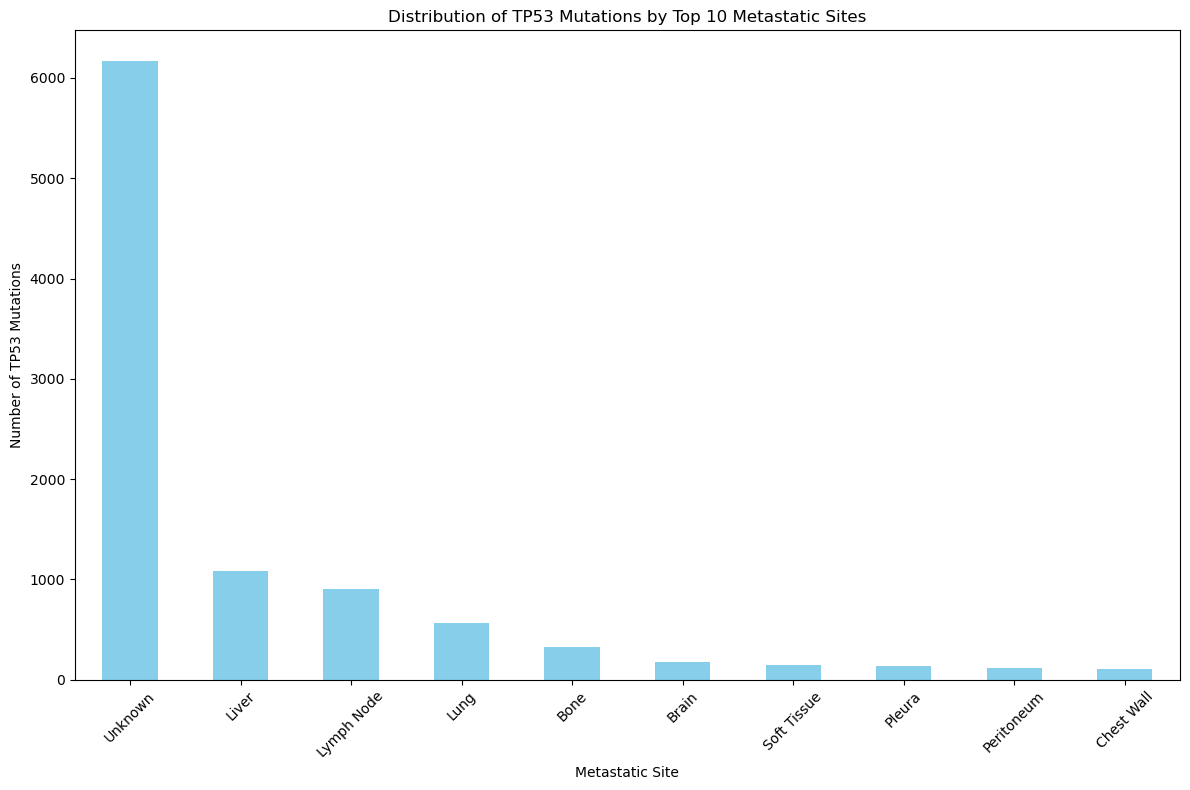

In [30]:
# Filtering for TP53 mutations
tp53_mutations = merged_data[merged_data['TP53'].notna()]

# Count the mutations by metastatic site
mutation_counts = tp53_mutations['Metastatic Site'].value_counts()

# Considering the top 10 metastatic sites
top_sites = mutation_counts.head(10).index
mutation_counts = mutation_counts[top_sites]

# Plotting
plt.figure(figsize=(12, 8))
mutation_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of TP53 Mutations by Top 10 Metastatic Sites')
plt.xlabel('Metastatic Site')
plt.ylabel('Number of TP53 Mutations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Load the clinical data
clinical_data = pd.read_csv("C:/Users/adler/TP53/msk_impact_2017_clinical_data.tsv", sep="\t")

# Filter the data for 'Breast Cancer' entries
breast_cancer_data = clinical_data[clinical_data['Cancer Type'] == 'Breast Cancer']

# Get the most common metastatic site for breast cancer
metastatic_site_counts = breast_cancer_data['Metastatic Site'].value_counts()
most_common_site = metastatic_site_counts.idxmax()
most_common_count = metastatic_site_counts.max()

print(f"The most common metastatic site for Breast Cancer is: {most_common_site} with {most_common_count} occurrences.")


The most common metastatic site for Breast Cancer is: Liver with 221 occurrences.


In [4]:
import pandas as pd

# Load the original data again
original_data = pd.read_csv("C:/Users/adler/TP53/msk_impact_2017_clinical_data.tsv", sep="\t")

# Create a deep copy of the DataFrame
backup_data = original_data.copy(deep=True)


In [5]:
# Replace 'Unknown' metastatic sites for 'Breast Cancer' entries with 'Liver'
mask = (clinical_data['Cancer Type'] == 'Breast Cancer') & (clinical_data['Metastatic Site'] == 'Unknown')
clinical_data.loc[mask, 'Metastatic Site'] = 'Liver'


In [6]:
# Filter the data for Mesothelioma cancer type
mesothelioma_data = clinical_data[clinical_data['Cancer Type'] == 'Mesothelioma']

# Get the most common metastatic site
common_metastatic_site = mesothelioma_data['Metastatic Site'].value_counts().idxmax()
common_metastatic_count = mesothelioma_data['Metastatic Site'].value_counts().max()

print(f"The most common metastatic site for Mesothelioma is {common_metastatic_site} with {common_metastatic_count} occurrences.")


The most common metastatic site for Mesothelioma is Lymph Node with 4 occurrences.


In [7]:
# Filter and update the 'Metastatic Site' column
clinical_data.loc[(clinical_data['Cancer Type'] == 'Mesothelioma') & 
                  (clinical_data['Metastatic Site'] == 'Unknown'), 
                  'Metastatic Site'] = 'Lymph Node'


In [8]:
endometrial_metastatic_counts = clinical_data[clinical_data['Cancer Type'] == 'Endometrial Cancer']['Metastatic Site'].value_counts()
endometrial_metastatic_counts


Lymph Node            18
Lung                  16
Omentum               14
Pelvis                11
Abdomen                7
Vagina                 7
Peritoneum             5
Liver                  5
Rectum                 2
Chest Wall             2
Colon                  2
Diaphragm              2
Ascites                2
Rib                    1
Kidney                 1
Rectosigmoid Colon     1
Retroperitoneum        1
Spleen                 1
Soft Tissue            1
Upper Tract            1
Muscle                 1
Bone                   1
Cervix                 1
Name: Metastatic Site, dtype: int64

In [9]:
original_data = backup_data.copy()


In [10]:
print(original_data.head())
print(backup_data.head())


          Study ID Patient ID          Sample ID         Cancer Type  \
0  msk_impact_2017  P-0000004  P-0000004-T01-IM3       Breast Cancer   
1  msk_impact_2017  P-0000015  P-0000015-T01-IM3       Breast Cancer   
2  msk_impact_2017  P-0000023  P-0000023-T01-IM3        Mesothelioma   
3  msk_impact_2017  P-0000024  P-0000024-T01-IM3  Endometrial Cancer   
4  msk_impact_2017  P-0000025  P-0000025-T01-IM3  Endometrial Cancer   

                                Cancer Type Detailed  DNA Input  \
0                   Breast Invasive Ductal Carcinoma      250.0   
1                   Breast Invasive Ductal Carcinoma      198.0   
2                            Peritoneal Mesothelioma      250.0   
3                     Uterine Endometrioid Carcinoma      250.0   
4  Uterine Serous Carcinoma/Uterine Papillary Ser...      250.0   

   Fraction Genome Altered Matched Status Metastatic Site  Mutation Count  \
0                   0.2782        Matched             NaN              16   
1         